# Import and prepare data for model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters/hitters_filtered
/kaggle/input/the-history-of-baseball/team.csv
/kaggle/input/the-history-of-baseball/college.csv
/kaggle/input/the-history-of-baseball/pitching_postseason.csv
/kaggle/input/the-history-of-baseball/team_half.csv
/kaggle/input/the-history-of-baseball/player_award_vote.csv
/kaggle/input/the-history-of-baseball/batting_postseason.csv
/kaggle/input/the-history-of-baseball/fielding.csv
/kaggle/input/the-history-of-baseball/hall_of_fame.csv
/kaggle/input/the-history-of-baseball/home_game.csv
/kaggle/input/the-history-of-baseball/hashes.txt
/kaggle/input/the-history-of-baseball/park.csv
/kaggle/input/the-history-of-baseball/player_college.csv
/kaggle/input/the-history-of-baseball/manager.csv
/kaggle/input/the-history-of-baseball/player.csv
/kaggle/input/the-history-of-baseball/player_award.csv
/kaggle/input/the-history-of-baseball/fielding_outfield.csv
/kaggle/input/the-history-of-baseball/database.sqlite
/kaggle/input/the-history-of-baseball/team_franchi

In [2]:
#python won't show a long unnecessary error message that comes up a lot
pd.options.mode.chained_assignment = None

In [3]:
hitters=pd.read_csv('/kaggle/input/hitters/hitters_filtered').drop(columns='Unnamed: 0')
hitters.head(10)

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,sh,sf,g_idp,inducted,percent,threshold,votedBy,year,years,avg
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,30.0,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0,0.278715
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,9.0,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0,0.289261
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,27.0,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0,0.332587
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,63.0,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0,0.232950
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,47.0,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0,0.288922
5,davisha01,29.0,1755.0,6653.0,1001.0,1841.0,361.0,145.0,75.0,951.0,...,142.0,0.0,0.0,N,0.009901,NaN,BBWAA,1946.0,2.0,0.276717
6,wallabo01,25.0,2383.0,8618.0,1057.0,2309.0,391.0,143.0,34.0,1121.0,...,173.0,0.0,0.0,Y,NaN,NaN,Veterans,1953.0,7.0,0.267928
7,sierrru01,30.0,2186.0,8044.0,1084.0,2152.0,428.0,59.0,306.0,1322.0,...,1.0,120.0,193.0,N,0.000000,0.750436,BBWAA,2012.0,1.0,0.267529
8,collied01,25.0,2826.0,9949.0,1821.0,3315.0,438.0,187.0,47.0,1300.0,...,512.0,0.0,0.0,Y,0.777372,0.751825,BBWAA,1939.0,4.0,0.333199
9,hornsro01,25.0,2259.0,8173.0,1579.0,2930.0,541.0,169.0,301.0,1584.0,...,216.0,0.0,3.0,Y,0.781116,0.751073,BBWAA,1942.0,5.0,0.358497


Add full player name, rather than just having pleyer ID.

In [4]:
names=pd.read_csv('/kaggle/input/the-history-of-baseball/player.csv')
names['name']=names['name_first']+' '+names['name_last']
names=names[['player_id','name']]
names=names[names['player_id'].isin(hitters['player_id'].tolist())]
hitters=hitters.join(names.set_index('player_id'),on='player_id')
hitters.head(10)

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,sf,g_idp,inducted,percent,threshold,votedBy,year,years,avg,name
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0,0.278715,Rickey Henderson
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0,0.289261,Harold Baines
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0,0.332587,Cap Anson
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0,0.232950,Rick Dempsey
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0,0.288922,Bill Buckner
5,davisha01,29.0,1755.0,6653.0,1001.0,1841.0,361.0,145.0,75.0,951.0,...,0.0,0.0,N,0.009901,NaN,BBWAA,1946.0,2.0,0.276717,Harry Davis
6,wallabo01,25.0,2383.0,8618.0,1057.0,2309.0,391.0,143.0,34.0,1121.0,...,0.0,0.0,Y,NaN,NaN,Veterans,1953.0,7.0,0.267928,Bobby Wallace
7,sierrru01,30.0,2186.0,8044.0,1084.0,2152.0,428.0,59.0,306.0,1322.0,...,120.0,193.0,N,0.000000,0.750436,BBWAA,2012.0,1.0,0.267529,Ruben Sierra
8,collied01,25.0,2826.0,9949.0,1821.0,3315.0,438.0,187.0,47.0,1300.0,...,0.0,0.0,Y,0.777372,0.751825,BBWAA,1939.0,4.0,0.333199,Eddie Collins
9,hornsro01,25.0,2259.0,8173.0,1579.0,2930.0,541.0,169.0,301.0,1584.0,...,0.0,3.0,Y,0.781116,0.751073,BBWAA,1942.0,5.0,0.358497,Rogers Hornsby


Some of the entries in the 'percent' column are empty. We have to fill these with something or cut them out in order to carry on with the 'percent' column in our machine learning algorithm.

In [5]:
hitters2=hitters[-hitters['percent'].isnull()].reset_index().drop(columns='index')

# Create decision tree regressor model

In [6]:
y=hitters2['percent']
features=['g','ab','r','h','rbi','bb','hr']
X=hitters2[features]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

# Evaluate model

Make new dataframe with all testing data, add predictions, whether each prediction would warrant a hall of fame induction, and if the prediction was correct.

In [8]:
df=pd.DataFrame(val_X)
df=df.join(hitters2[['player_id','name','inducted','percent','threshold','year']])
df['prediction']=predictions

df['guess']=''
for index in df.reset_index()['index']:
    if df['prediction'][index]>=df['threshold'][index]:
        df['guess'][index]='Y'
    else:
        df['guess'][index]='N'
df['correct?']=df['guess']==df['inducted']

#change the order of the columns
df=df[['name','player_id','g','ab','r','h','hr','rbi','bb','percent','threshold','year','inducted','prediction','guess',
      'correct?']]

In [9]:
df['correct?'].value_counts()

True     231
False     34
Name: correct?, dtype: int64

231/265 predictions correct, or 87.2%.

Let's take a closer look at the actual hall of famers in the testing data.

In [10]:
pd.set_option('display.max_rows', None)
hof=df[df['inducted']=='Y']
hof

,name,player_id,g,ab,r,h,hr,rbi,bb,percent,threshold,year,inducted,prediction,guess,correct?
23,Carl Yastrzemski,yastrca01,3308.0,11988.0,1816.0,3419.0,452.0,1844.0,1845.0,0.946309,0.751678,1989.0,Y,0.844660,Y,True
148,Rod Carew,carewro01,2469.0,9315.0,1424.0,3053.0,92.0,1015.0,1018.0,0.905192,0.751693,1991.0,Y,0.012821,N,False
60,George Brett,brettge01,2707.0,10349.0,1583.0,3154.0,317.0,1595.0,1096.0,0.981891,0.750503,1999.0,Y,0.781116,Y,True
161,Roberto Alomar,alomaro01,2379.0,9073.0,1508.0,2724.0,210.0,1134.0,1032.0,0.900172,0.750430,2011.0,Y,0.817568,Y,True
201,Luis Aparicio,aparilu01,2601.0,10230.0,1335.0,2677.0,83.0,791.0,736.0,0.846154,0.751861,1984.0,Y,0.838120,Y,True
299,Ryne Sandberg,sandbry01,2164.0,8385.0,1318.0,2386.0,282.0,1061.0,761.0,0.761628,0.750000,2005.0,Y,0.409091,N,False
659,Jackie Robinson,robinja02,1382.0,4877.0,947.0,1518.0,137.0,734.0,740.0,0.775000,0.750000,1962.0,Y,0.018587,N,False
329,George Sisler,sislege01,2055.0,8267.0,1284.0,2812.0,102.0,1175.0,472.0,0.857664,0.751825,1939.0,Y,0.002273,N,False
173,Eddie Mathews,matheed01,2391.0,8537.0,1509.0,2315.0,512.0,1453.0,1444.0,0.794195,0.751979,1978.0,Y,0.882192,Y,True
354,Jim Rice,riceji01,2089.0,8225.0,1249.0,2452.0,382.0,1451.0,670.0,0.764378,0.751391,2009.0,Y,0.040816,N,False


In [11]:
hof['correct?'].value_counts()

True     18
False    12
Name: correct?, dtype: int64

Only 18 out of the 30 hall of famers were predicted to be hall of famers by the model.

# Visualize the data, predictions

In [12]:
import matplotlib.pyplot as plt

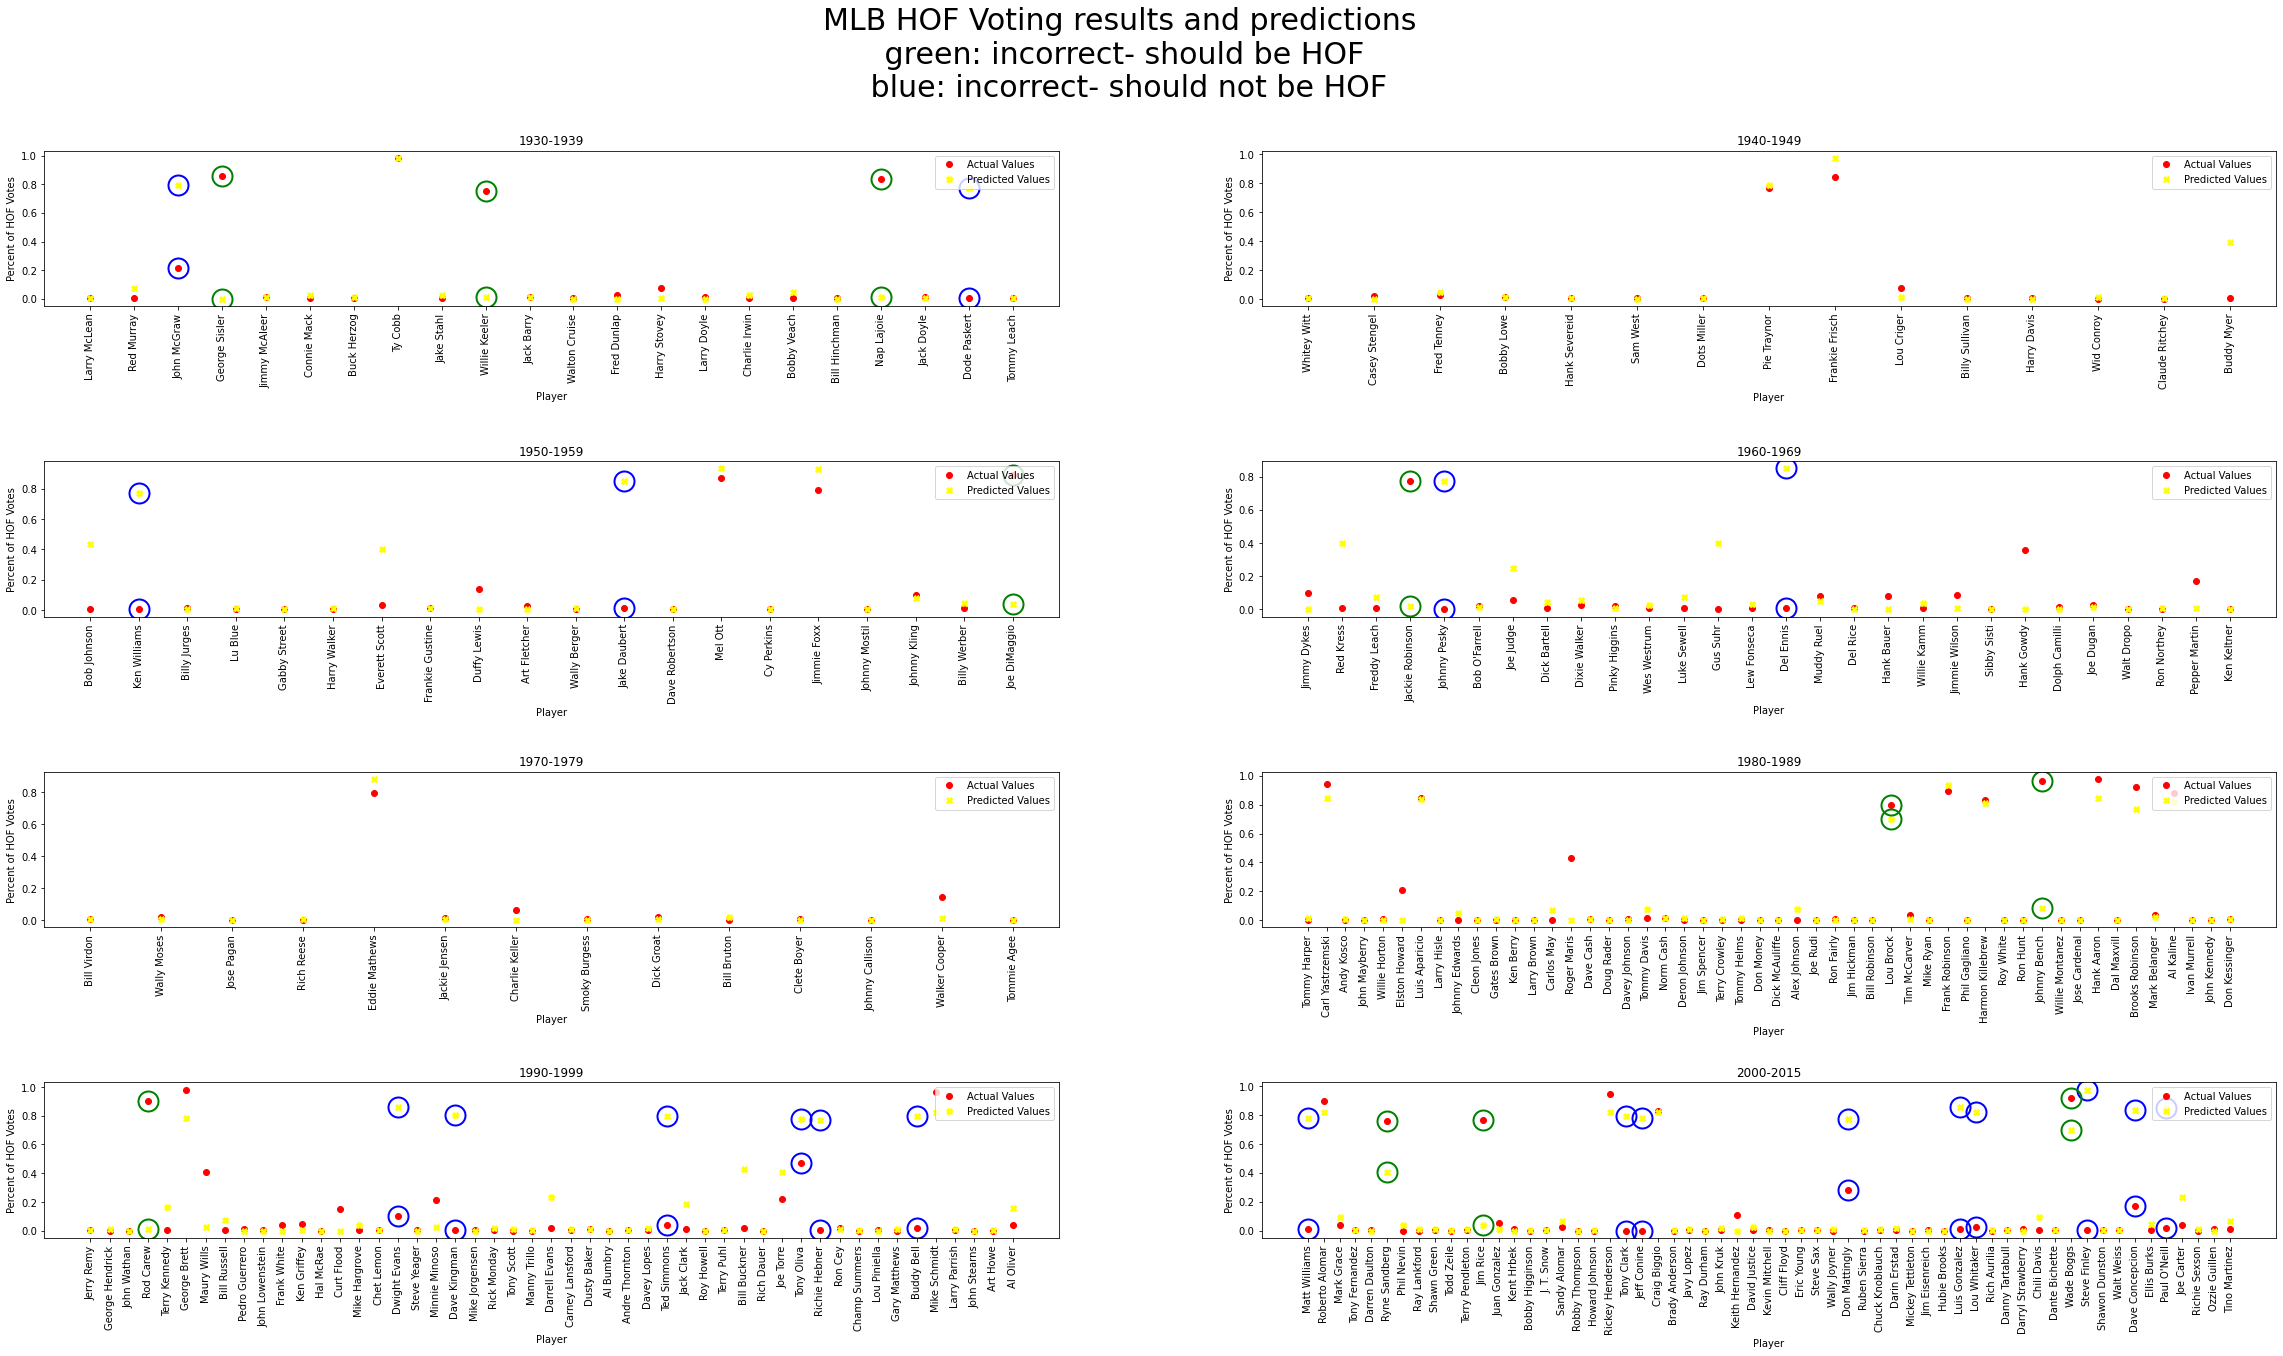

In [13]:
s30=range(1930,1940)
s40=range(1940,1950)
s50=range(1950,1960)
s60=range(1960,1970)
s70=range(1970,1980)
s80=range(1980,1990)
s90=range(1990,2000)
s2000 = range(2000,2016)

decades=[s30,s40,s50,s60,s70,s80,s90,s2000]

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(40, 20))
fig.subplots_adjust(hspace=1)
plt.suptitle('MLB HOF Voting results and predictions \n green: incorrect- should be HOF \n blue: incorrect- should not be HOF',fontsize=30)
for decade,ax in zip(decades,axes.flatten()):
    frame=df[df['year'].isin(decade)]
    
    ax.plot(frame['name'],frame['percent'],'o',color='red',label = 'Actual Values')

    ax.plot(frame['name'],frame['prediction'],'X',color='yellow',label = 'Predicted Values')
  
    incorrect=frame[frame['correct?'].isin([False])]
    circle_rad = 10 
    
    overshoot=incorrect[incorrect['prediction']>incorrect['percent']]
    ax.plot(overshoot['name'], overshoot['percent'], 'o',ms=circle_rad * 2, mec='b', mfc='none', mew=2)
    ax.plot(overshoot['name'], overshoot['prediction'], 'o',ms=circle_rad * 2, mec='b', mfc='none', mew=2)
    
    undershoot=incorrect[incorrect['percent']>incorrect['prediction']]
    ax.plot(undershoot['name'], undershoot['percent'], 'o',ms=circle_rad * 2, mec='g', mfc='none', mew=2)
    ax.plot(undershoot['name'], undershoot['prediction'], 'o',ms=circle_rad * 2, mec='g', mfc='none', mew=2)
    
    ax.set_xlabel('Player')
    ax.set_ylabel('Percent of HOF Votes')
    ax.set_title(str(decade[0])+'-'+str(decade[-1]))
    ax.legend(loc = 'upper right')
    ax.set_xticklabels(labels=frame['name'],rotation=90)

# Interpreting the visuals

These visuals help visualize what the model did well and what it didn't. What stands out are the number of blue circles- this being players that were predicted to make the HOF but didn't actually get voted in. Let's take a closer look at all of the incorrect predictions.

In [14]:
incorrect=df[df['correct?'].isin([False])]
incorrect

,name,player_id,g,ab,r,h,hr,rbi,bb,percent,threshold,year,inducted,prediction,guess,correct?
245,Matt Williams,willima04,1866.0,7000.0,997.0,1878.0,378.0,1218.0,469.0,0.012987,0.751391,2009.0,N,0.780242,Y,False
148,Rod Carew,carewro01,2469.0,9315.0,1424.0,3053.0,92.0,1015.0,1018.0,0.905192,0.751693,1991.0,Y,0.012821,N,False
480,Ken Williams,willike01,1397.0,4862.0,860.0,1552.0,196.0,913.0,566.0,0.005181,0.751295,1958.0,N,0.773333,Y,False
299,Ryne Sandberg,sandbry01,2164.0,8385.0,1318.0,2386.0,282.0,1061.0,761.0,0.761628,0.750000,2005.0,Y,0.409091,N,False
659,Jackie Robinson,robinja02,1382.0,4877.0,947.0,1518.0,137.0,734.0,740.0,0.775000,0.750000,1962.0,Y,0.018587,N,False
550,Johnny Pesky,peskyjo01,1270.0,4745.0,867.0,1455.0,17.0,404.0,662.0,0.003717,0.750929,1960.0,N,0.773333,Y,False
274,John McGraw,mcgrajo01,1099.0,3924.0,1024.0,1309.0,13.0,462.0,836.0,0.217949,0.756410,1936.0,N,0.795031,Y,False
329,George Sisler,sislege01,2055.0,8267.0,1284.0,2812.0,102.0,1175.0,472.0,0.857664,0.751825,1939.0,Y,0.002273,N,False
354,Jim Rice,riceji01,2089.0,8225.0,1249.0,2452.0,382.0,1451.0,670.0,0.764378,0.751391,2009.0,Y,0.040816,N,False
92,Dwight Evans,evansdw01,2606.0,8996.0,1470.0,2446.0,385.0,1384.0,1391.0,0.103594,0.750529,1999.0,N,0.857143,Y,False


In [15]:
overshoot=incorrect[incorrect['prediction']>incorrect['percent']]
len(overshoot)

22

22 of the incorrect predictions were the result of too high of a prediction (like a false positive).

In [16]:
undershoot=incorrect[incorrect['percent']>incorrect['prediction']]
len(undershoot)

12

12 of the incorrect predictions were the result of too low of a prediction (like a false negative).

Takeaways:

-87.2% accuracy seems pretty good for a start, but looking closer at the data we realize that there are many flaws in the model.
-Only 18 out of the 30 hall of famers in the testing data were actually predicted to make the hall of fame
-22 players that are not hall of famers were predicted to be

This means that most of the players our model predicted to be in the hall of fame are not, thus 87.2% accuracy is certainly not a fair way to summarize the data.

# Future work

There are so many ways to improve this model. Some ideas include:


1. Including player awards such as MVP, silver slugger, and many other baseball awards
2. Include advanced stats such as slugging percentage and on base percentage
3. Include postseason stats and other stats that weren't included in this model.
4. Changing the paramaters to fine tune the model- I have some other machine learning notebooks that show how to do this
5. Try a different type of model, ex. random forest regressor
6. Instead of predicting percent of the vote, try making it a bunary classification problem. That is, rather than predict a numerical value and determine if that warrants a HOF induction, simply predict whether or not a player will get inducted into the HOF.
7. The data used for this project is dated. Data through 2020 will help create a better model. It may be hard to find that data, however, and the data for this project was already avaialable on kaggle which made it easier to use

There are more ways to help improve the model as these are just what come to mind. The other notebooks show how I combined data from different datasets to create the data for this model, and how I decided which features to put in the model.